# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
import json

In [6]:
# Fetch current BTC price
btc_api = requests.get(btc_url)
btc_data = btc_api.text
parse_json = json.loads(btc_data)
btc_price = parse_json['data']['1']['quotes']['CAD']['price']
print(f"The current price of Bitcoin is ${btc_price}")

#print(btc_price.headers['Content-Type'])
#print(btc_price)

# Fetch current ETH price
eth_api = requests.get(eth_url)
eth_data = eth_api.text
parse_json = json.loads(eth_data)
eth_price = parse_json['data']['1027']['quotes']['CAD']['price']
print(f"The current price of Ethereun is ${eth_price}")
#print(eth_price.headers['Content-Type'])


The current price of Bitcoin is $26638.624698
The current price of Ethereun is $1831.355302


In [7]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} CAD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} CAD")

The current value of your 1.2 BTC is $31966.35 CAD
The current value of your 5.3 ETH is $9706.18 CAD



### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [10]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2022-09-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                   \
                             open     high    low   close   volume   
timestamp                                                            
2022-09-01 04:00:00+00:00  100.07  100.145  99.66  100.07  8960595   

                                                     SPY                  \
                          trade_count       vwap    open    high     low   
timestamp                                                                  
2022-09-01 04:00:00+00:00       32259  99.954674  392.88  396.78  390.04   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-09-01 04:00:00+00:00  396.42  78315802      594723  393.055687

In [12]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["open"])
spy_close_price = float(df_portfolio["SPY"]["open"])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.07
Current SPY closing price: $392.88


In [13]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19644.00
The current value of your 200 AGG shares is $20014.00


### Savings Health Analysis

In [14]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
#financial_assets = my_spy_value + my_agg_value
#print(f"My current assets = ${financial_assets:,.2f}")
shares_data = {
    "shares": [200, 50]
}

tickers = ["AGG", "SPY"]

df_savings = pd.DataFrame(shares_data, index=tickers)


# Create savings DataFrame
# YOUR CODE HERE!
df_savings['values']=[my_agg_value, my_spy_value]

# Display savings DataFrame
display(df_savings)

shares   values
AGG     200  20014.0
SPY      50  19644.0

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='shares'>

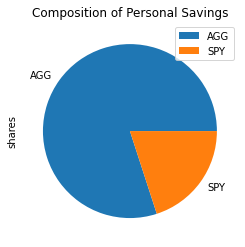

In [15]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="shares", title="Composition of Personal Savings")

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = my_spy_value + my_agg_value
print(f"Your total savings = ${total_savings:,.2f}")

# Validate saving health
# YOUR CODE HERE!
if total_savings >= emergency_fund:
    print("Sufficent savings")
elif total_savings < emergency_fund:
    print("You need to save more!")
else:
    print("Not enough information")

Your total savings = $39,658.00
Sufficent savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
ticker = ["AGG","SPY"]

# Set timeframe to "1Day"
timeframe = "1Day"

df_stock_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)



# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head(10)

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   
2016-05-09 04:00:00+00:00  111.11  111.1400  111.0050  111.04  2173463   
2016-05-10 04:00:00+00:00  111.06  111.1000  110.9900  111.09  2103822   
2016-05-11 04:00:00+00:00  111.06  111.2600  111.0200  111.09  2507055   
2016-05-12 04:00:00+00:00  110.92  111.1000  110.9200  110.99  1938846   
2016-05-13 04:00:00+00:00  111.08  111.2300  111.0300  111.20  1511386   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.1800  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.8000  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.8500  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.9800  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.7700  203.88   
2016-05-09 04:00:00+00:00       12416  111.070531  205.58  206.4000  205.36   
2016-05-10 04:00:00+00:00       10989  111.042210  206.64  208.5000  206.64   
2016-05-11 04:00:00+00:00        9310  111.139311  207.89  208.5400  206.50   
2016-05-12 04:00:00+00:00        8182  111.018576  207.29  207.4899  205.37   
2016-05-13 04:00:00+00:00        9321  111.155567  206.23  206.8600  204.38   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074  
2016-05-09 04:00:00+00:00  205.89   74374922      263989  205.884750  
2016-05-10 04:00:00+00:00  208.46   77472207      267366  207.804326  
2016-05-11 04:00:00+00:00  206.50   81726989      295512  207.408406  
2016-05-12 04:00:00+00:00  206.55   89586108      344294  206.451838  
2016-05-13 04:00:00+00:00  204.72   96474527      359281  205.579209

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [20]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [251]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/elle/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3          4         5         6    \
0     1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000   
1     0.993963  0.996996  0.996843  1.001330   1.005262  0.997761  0.996102   
2     0.995031  0.993501  0.999638  1.000985   1.014908  1.002824  1.001048   
3     0.988023  0.992343  1.003773  1.003476   1.017182  0.995098  0.999969   
4     0.986948  0.996551  1.002269  0.998464   1.034113  0.996174  1.012736   
...        ...       ...       ...       ...        ...       ...       ...   
7556  5.163445  9.203081  7.782751  6.699224  11.304029  5.852917  8.301541   
7557  5.180046  9.215903  7.758261  6.693461  11.269492  5.843821  8.304994   
7558  5.162488  9.261467  7.717782  6.712946  11.170003  5.850320  8.368083   
7559  5.150873  9.280276  7.770308  6.694921  11.084664  5.866372  8.416552   
7560  5.125575  9.295076  7.762079  6.715432  11.144568  5.880335  8.365780   

           7         8          9    ...       490       491       492  \
0     1.000000  1.000000   1.000000  ...  1.000000  1.000000  1.000000   
1     1.009193  1.001428   0.996389  ...  0.998336  0.999955  0.999341   
2     1.008881  1.009360   1.004343  ...  1.005998  1.012134  0.993870   
3     0.996348  1.014609   1.003146  ...  1.004199  1.009826  0.996402   
4     0.990639  1.013146   0.991667  ...  0.999011  1.004086  0.997580   
...        ...       ...        ...  ...       ...       ...       ...   
7556  7.072741  6.027551  12.313475  ...  4.792819  7.226135  7.467734   
7557  7.084582  6.055957  12.382280  ...  4.795627  7.256014  7.428521   
7558  7.072563  6.045933  12.360953  ...  4.799800  7.267326  7.404661   
7559  7.069949  6.082704  12.384792  ...  4.805623  7.254254  7.433631   
7560  7.113729  6.080907  12.311067  ...  4.818953  7.221948  7.390538   

            493        494       495        496       497       498       499  
0      1.000000   1.000000  1.000000   1.000000  1.000000  1.000000  1.000000  
1      0.999559   0.993908  0.995851   1.009355  1.002339  0.998788  0.995408  
2      0.995019   0.999939  0.998733   1.016753  1.000869  1.005859  0.987909  
3      0.996158   1.004186  0.999365   1.009400  0.998678  1.012406  0.992919  
4      1.001050   1.005409  1.005123   1.001048  1.000287  1.006094  0.997135  
...         ...        ...       ...        ...       ...       ...       ...  
7556  12.406898  23.994580  9.169625  27.190897  4.995481  3.190388  3.094369  
7557  12.347909  23.962416  9.212554  27.181827  4.991643  3.193249  3.103726  
7558  12.361740  24.119846  9.189430  27.280413  4.989130  3.166627  3.078429  
7559  12.178567  24.276093  9.140924  27.250180  4.973692  3.160097  3.082422  
7560  12.295644  24.496003  9.241937  27.351188  5.000254  3.155110  3.077334  

[7561 rows x 500 columns]

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/elle/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

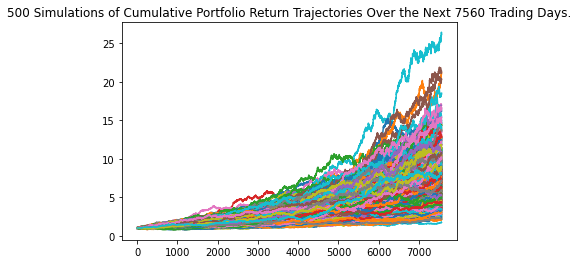

In [21]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyear.plot_simulation()

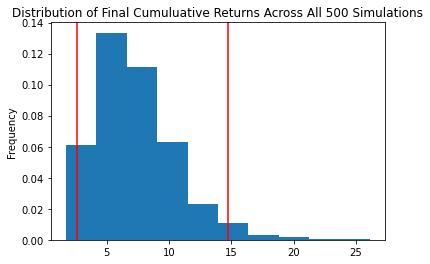

In [22]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyear.plot_distribution()

dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              7.350916
std               3.299054
min               1.718708
25%               4.976897
50%               6.854670
75%               9.072699
max              26.147782
95% CI Lower      2.648586
95% CI Upper     14.703481
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $52971.71 and $294069.61


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $79457.57 and $441104.42


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/elle/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997264  1.001139  0.998104  0.989067  1.000023  1.006083  0.988368   
2     1.000098  1.008896  1.002835  0.990714  1.014225  1.009466  0.988634   
3     1.002273  1.013082  1.012793  0.997951  1.015688  1.016433  0.994750   
4     1.006580  1.013489  1.018611  0.994939  1.012247  1.014125  0.997036   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.273835  1.817044  2.088495  1.733988  1.258342  1.501809  1.347571   
1257  1.265292  1.827879  2.093915  1.741892  1.254238  1.501993  1.349912   
1258  1.257252  1.828217  2.093268  1.736545  1.247467  1.496972  1.355739   
1259  1.262760  1.819502  2.082896  1.734094  1.253929  1.489246  1.359133   
1260  1.272120  1.829400  2.103691  1.723542  1.255458  1.486449  1.356594   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.994691  1.004132  1.001885  ...  0.993950  0.995957  1.001265   
2     0.996796  1.006223  1.001830  ...  0.990202  0.991074  1.002489   
3     0.993818  1.014767  1.005803  ...  0.990197  0.988907  1.001264   
4     0.990990  1.013470  1.007990  ...  0.995952  0.994558  1.001905   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.290501  1.228043  1.462715  ...  1.199553  1.276838  1.170308   
1257  1.277366  1.236825  1.449047  ...  1.192356  1.283340  1.167723   
1258  1.272021  1.231967  1.459108  ...  1.188353  1.286047  1.165217   
1259  1.254113  1.235503  1.471953  ...  1.191616  1.289130  1.160478   
1260  1.245243  1.246938  1.488584  ...  1.191188  1.289338  1.172678   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.007497  1.005905  1.000184  0.996409  0.997813  1.000979  1.004735  
2     1.007678  0.993099  1.005201  0.993171  0.989570  1.002106  1.004019  
3     1.010746  0.991582  1.008127  0.999786  0.995798  1.000475  0.997683  
4     1.012736  0.997232  1.001845  1.004072  0.989921  1.010262  0.985282  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.018309  1.318720  1.573745  1.672104  0.859280  1.243732  1.322132  
1257  1.017980  1.325332  1.576004  1.672018  0.856764  1.245449  1.326183  
1258  1.018877  1.332930  1.564227  1.670675  0.862587  1.241431  1.325437  
1259  1.020306  1.330017  1.554775  1.672742  0.857627  1.243056  1.333534  
1260  1.025945  1.335909  1.552619  1.684183  0.861715  1.249953  1.341443  

[1261 rows x 500 columns]

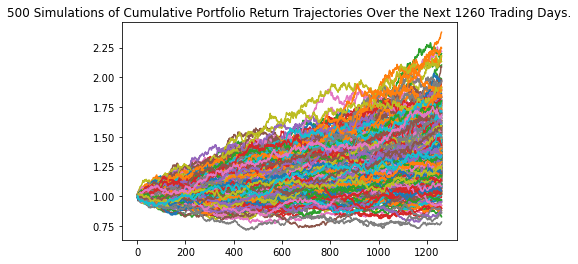

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fiveyear.plot_simulation()

line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

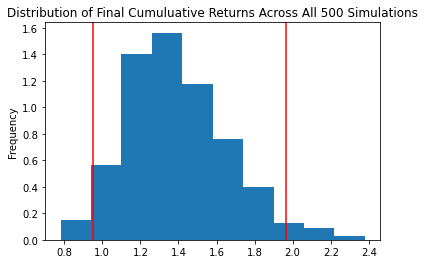

In [29]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_fiveyear.plot_distribution()

dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.391989
std               0.260518
min               0.780248
25%               1.205053
50%               1.356369
75%               1.557526
max               2.379299
95% CI Lower      0.949981
95% CI Upper      1.965378
Name: 1260, dtype: float64


In [31]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*30000,2)
ci_upper_five = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 5 years will end within in the range of $28499.44 and $58961.35


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/elle/Desktop/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.993988  1.000277  0.993245  1.003060  0.997508  0.995181  1.005230   
2     0.992791  0.993785  0.994126  1.006484  0.994212  0.994284  1.006948   
3     0.999158  0.992474  0.998937  1.001000  0.992766  0.993054  1.006740   
4     1.003205  0.993660  0.998434  0.997829  0.996096  1.000938  1.000948   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.833771  2.519409  3.306838  2.734110  2.298132  3.440374  1.437151   
2517  1.833673  2.522322  3.321047  2.723504  2.296425  3.446531  1.441199   
2518  1.839009  2.537941  3.342462  2.738067  2.299986  3.467442  1.444074   
2519  1.839403  2.534147  3.361204  2.745347  2.300026  3.452663  1.439721   
2520  1.844900  2.544087  3.355035  2.748766  2.297818  3.438815  1.434018   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.004294  1.007636  0.998794  ...  0.997278  0.997684  1.001391   
2     1.011197  1.010709  1.003100  ...  0.996703  0.994403  1.002228   
3     1.015315  1.009574  1.005098  ...  1.002215  1.000303  0.994282   
4     1.017500  1.008924  1.014612  ...  1.010969  1.002136  1.001796   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.451191  1.936905  2.233717  ...  1.573253  2.525787  1.610103   
2517  1.454064  1.918788  2.228924  ...  1.569789  2.527099  1.612796   
2518  1.462129  1.915765  2.220474  ...  1.573573  2.516176  1.607413   
2519  1.461990  1.913747  2.210869  ...  1.568451  2.530479  1.612017   
2520  1.467716  1.916768  2.206101  ...  1.569148  2.544451  1.630879   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.993582  1.001946  0.988611  1.008567  0.998951  1.005440  0.997824  
2     0.990988  1.002842  0.989861  1.004702  0.995120  1.002345  0.999407  
3     0.985739  1.005873  0.993964  1.004780  0.997356  0.996911  1.000326  
4     0.991260  1.004036  1.003502  1.005834  0.996572  1.001372  0.995494  
...        ...       ...       ...       ...       ...       ...       ...  
2516  2.003321  1.610834  1.524832  2.289443  2.229536  1.934031  2.762905  
2517  2.004539  1.598342  1.540692  2.295762  2.220875  1.928723  2.767365  
2518  1.992390  1.591251  1.544443  2.282623  2.215856  1.922512  2.766838  
2519  2.009563  1.596485  1.546129  2.281131  2.206023  1.921008  2.778883  
2520  2.021451  1.610594  1.556856  2.287464  2.211448  1.918865  2.774484  

[2521 rows x 500 columns]

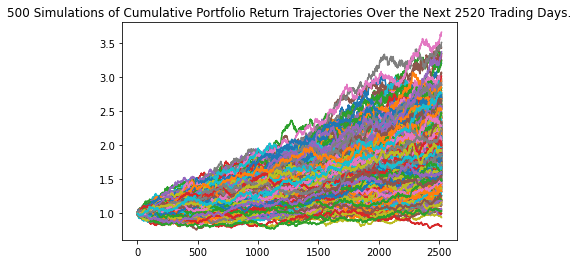

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_tenyear.plot_simulation()

line_plot.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

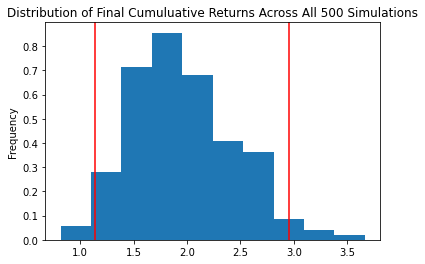

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_tenyear.plot_distribution()

dist_plot.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl) 

count           500.000000
mean              1.958161
std               0.482189
min               0.814115
25%               1.611136
50%               1.893634
75%               2.257550
max               3.665304
95% CI Lower      1.137220
95% CI Upper      2.953384
Name: 2520, dtype: float64


In [37]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $68233.21 and $177203.05
